# Chapter 3: Sampling the Imaginary - Samples

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az

### Code 3.1

Using Bayes' theorem to invert probability.

$$\text{P}(\text{vampire}|\text{positive}) = \frac{\text{P}(\text{positive}|\text{vampire})\cdot \text{P}(\text{vampire})}{\text{P}(\text{positive})}$$

In [2]:
pr_positive_vampire = 0.95
pr_positive_mortal = 0.01
pr_vampire = 0.001
pr_positive = pr_positive_vampire * pr_vampire + pr_positive_mortal * (1 - pr_vampire)
pr_vampire_positive = pr_positive_vampire * pr_vampire / pr_positive
print(pr_vampire_positive)

0.08683729433272395


### Code 3.2

Computing the posterior for the globe tossing problem.

In [3]:
GRID_SIZE = 1000

p_grid = np.linspace(0,1,GRID_SIZE)
prob_p = np.repeat(1,GRID_SIZE)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / posterior.sum()

### Code 3.3

Getting individual values that appear in proportion to the posterior probability.

In [4]:
samples = np.random.choice(p_grid, p=posterior, size=GRID_SIZE, replace=True)

### Code 3.4

Plotting the individual values.

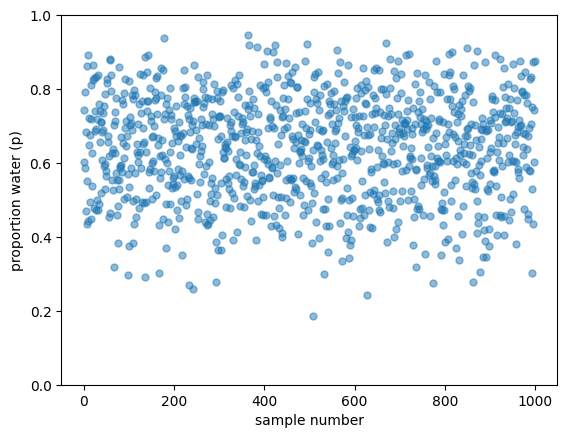

In [5]:
plt.plot(samples, '.', alpha=0.5, markersize=10)
plt.xlabel('sample number')
plt.ylabel('proportion water (p)')
plt.ylim((0,1));

### Code 3.5

Density estimate computed from the samples.

Text(0, 0.5, 'Density')

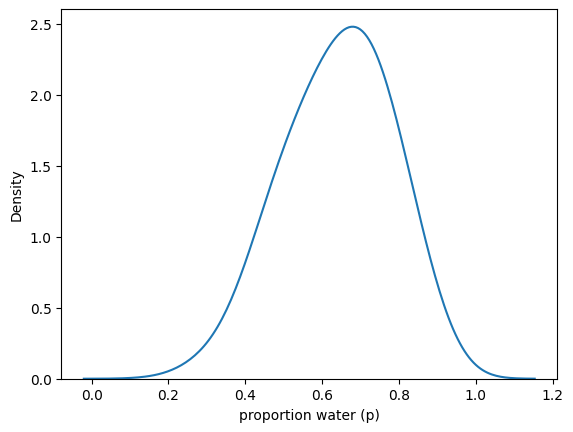

In [6]:
sns.kdeplot(samples, bw_method=0.5)
plt.xlabel('proportion water (p)')
plt.ylabel('Density')

### Code 3.6

**Intervals of defined boundary.**

Posterior probability that the proportion of water is less than 0.5.

In [7]:
sum(posterior[p_grid < 0.5])

0.17187458902022879

### Code 3.7

Frequency of parameter values below 0.5.

In [8]:
sum(samples < 0.5) / GRID_SIZE

0.177

### Code 3.8

How much posterior probability lies between 0.5 and 0.75.

In [9]:
sum((samples > 0.5) & (samples < 0.75)) / GRID_SIZE

0.59

### Code 3.9

**Intervals of defined mass.**

Where is the 80th percentile of the dataset.

In [10]:
np.quantile(samples, 0.8)

0.7677677677677678

### Code 3.10

Where is the 10th and the 90th percentile.

In [11]:
np.quantile(samples, [0.1, 0.9])

array([0.45635636, 0.81391391])

### Code 3.11

Computing a highly skewed posterior, and observing 3 waters in three tosses and a uniform (flat) prior.

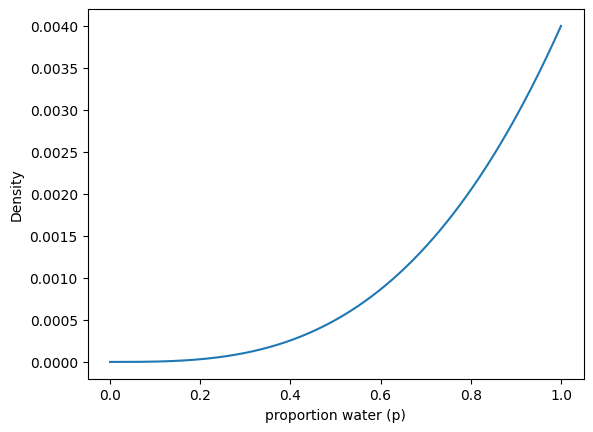

In [12]:
p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.repeat(1, GRID_SIZE)
likelihood = stats.binom.pmf(k=3, n=3, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = np.random.choice(p_grid, size=GRID_SIZE, replace=True, p=posterior)

plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

### Code 3.12

Computing the 50th percentile compatibility interval.

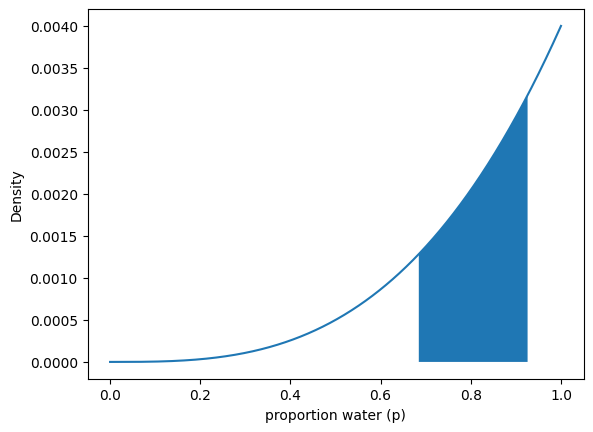

In [13]:
q1, q3 = np.percentile(samples, [25, 75])
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density")
plt.fill_between(p_grid, posterior, where=(p_grid > q1) & (p_grid < q3));

### Code 3.13

Computing the Highest Posterior Density Interval.

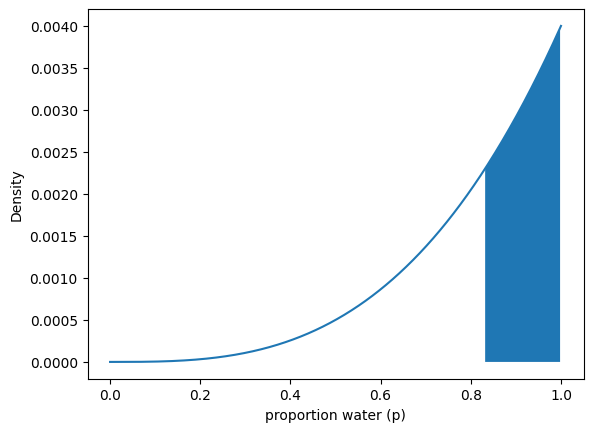

In [14]:
start, end = az.hdi(samples, hdi_prob=0.5)
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density")
plt.fill_between(p_grid, posterior, where=(p_grid > start) & (p_grid < end));

### Code 3.14

Parameter with highest posterior probability, a *maximum a posteriori* (MAP).

In [15]:
p_grid[posterior.argmax()]

1.0

### Code 3.15

Find the same value by finding the mode of the samples.

In [16]:
stats.mode(samples, keepdims=False)[0]

0.8478478478478478

### Code 3.16

There is also the mean and the median, but it is not so interesting.

In [17]:
print('Mean: ', samples.mean())
print('Median: ', np.median(samples))

Mean:  0.7852812812812813
Median:  0.8318318318318318


### Code 3.17

Compute the expected loss.

In [18]:
sum(posterior * abs(0.5 - p_grid))

0.3128751874998122

### Code 3.18

Compute the calculation for every possible decision.

In [19]:
loss = np.array([sum(posterior * abs(p - p_grid)) for p in p_grid])

### Code 3.19

Now it is easy to find the parameter with minimum loss.

In [20]:
p_grid[loss.argmin()]

0.8408408408408409

### Code 3.20

Quickly compute the probabilities of all possible scenarios in two tosses of the globe.

In [21]:
stats.binom.pmf(k=[0,1,2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

### Code 3.21

Generate one single dummy data.

In [22]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([1])

### Code 3.22

Generate ten samples of dummy data.

In [23]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 1, 2, 1, 2, 2, 1, 2, 1, 2])

### Code 3.23

Generate a sample of 100000, and get the distribution.

In [24]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=100_000)
np.unique(dummy_w, return_counts=True)

(array([0, 1, 2]), array([ 8950, 42062, 48988]))

### Code 3.24

Plot an histogram to check frequency distribution in nine throws.

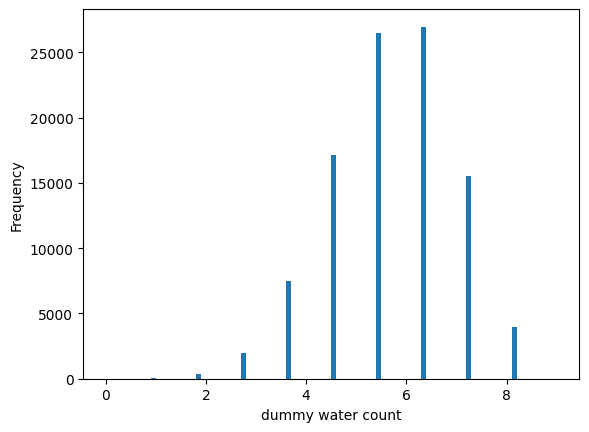

In [25]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=100_000)
plt.hist(dummy_w, width=0.1)
plt.xlabel('dummy water count')
plt.ylabel('Frequency')
plt.show();

### Code 3.25

Simulate predicted observations for a single value of $p=0.6$.

In [26]:
w = stats.binom.rvs(n=9, p=0.6, size=1000)

### Code 3.26

Propagate parameter uncertainty into these predictions.

In [27]:
w = stats.binom.rvs(n=9, p=samples, size=1000)